# Ecommerce Data Analysis

Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum

## Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

## Datasets

In [2]:
df_product = pd.read_csv('data/df_product.csv')

In [2]:
# reading data
df_product = pd.read_csv('data/df_product.csv')
df_basket = pd.read_csv('data/df_basket.csv')
df_demo = pd.read_csv('data/df_demo.csv') # Users' demographics data
df_fav = pd.read_csv('data/df_fav.csv')
df_search_term = pd.read_csv('data/df_search_term.csv')
df_trx = pd.read_csv('data/df_trx.csv')
df_visit = pd.read_csv('data/df_visit.csv')

df_target_train = pd.read_csv('data/df_target_train.csv')
df_test = pd.read_csv('data/df_test.csv')

### df_product

df_product: Products' information data

- **contentid:** Unique ID given to the product.
- **currentbugroupname:** Business Group Name (can be thought of as a broader category) of the product.
- **brandid:** Unique ID given to the brand of the product.
- **gender:** Target gender group of the product.
- **age:** Target age group of the product.
- **title:** Title of the product.
- **categoryname:** Category name of the product.

In [3]:
df_product.head(10)

,contentid,currentbugroupname,brandid,gender,age,title,categoryname
0,40100964,Ayakkabı & Çanta,37787,Erkek,Yetişkin,Siyah Kauçuk Taban Büyük Numara Spor Ayakkab R...,Klasik Ayakkabı
1,40427970,Branded Tekstil,169,Kadın,Yetişkin,Kadın Siyah Çizgili Cepli Kuşaklı Pantolon,Pantolon
2,41026644,FMCG,20150,Unisex,Yetişkin,Color Growth Healt Formula (800-1200) 100gr Aç...,Akvaryum Balık Yemleri
3,41227029,Branded Tekstil,11806,Kadın,Yetişkin,Kadın Pamuk Paçalı Ribana Külot B005,Külot
4,40770080,Ev,2195,Unisex,Yetişkin,Suki - Sushi Seti 8 Parça,Tabak
5,32196943,GAS,366101,Erkek,Yetişkin,Erkek Eşofman Altı - S -,Spor Eşofman Altı
6,41767813,GM,17150,Unisex,Yetişkin,Hayati Inanç Can Veren Pervaneler Set 6 Kitap,Deneme - İnceleme
7,33011110,Branded Tekstil,877,Erkek,Yetişkin,Micro Dokuma Takım Elbise,Takım Elbise
8,41838807,Branded Tekstil,1220,Kadın,Yetişkin,V Yaka Bluz - Kiremit Çiçekli,Bluz
9,42791183,Branded Tekstil,710,Unisex,Yetişkin,Siyah Tek Kollu Askılı Uzun Abiye Elbise,Abiye & Mezuniyet Elbisesi


In [4]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441753 entries, 0 to 1441752
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   contentid           1441753 non-null  int64 
 1   currentbugroupname  1441753 non-null  object
 2   brandid             1441753 non-null  int64 
 3   gender              1220171 non-null  object
 4   age                 1130547 non-null  object
 5   title               1441165 non-null  object
 6   categoryname        1441753 non-null  object
dtypes: int64(2), object(5)
memory usage: 77.0+ MB


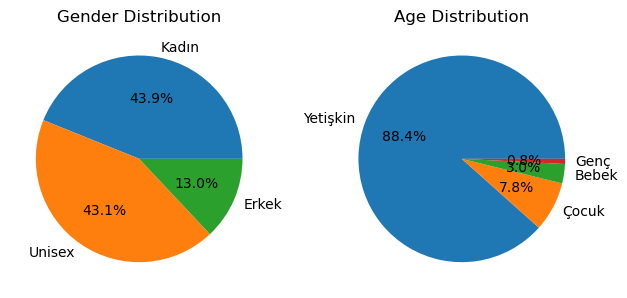

In [5]:
# create pie chart for the gender and age features separately. Compare the number of products. Please put the charts side by side.
# Create pie chart for the gender feature
gender_counts = df_product['gender'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')

# Create pie chart for the age feature
age_counts = df_product['age'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')

# Adjust the layout to put the charts side by side
plt.tight_layout()

# Show the charts
plt.show()

In [9]:
text = " ".join(i for i in df_product.title.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

** Tasks

-- In each currentbugroupname, how many categories do the dataset have?

-- try to visualize the category names at some level (be aware of it's categorical but the number of unique members is high)

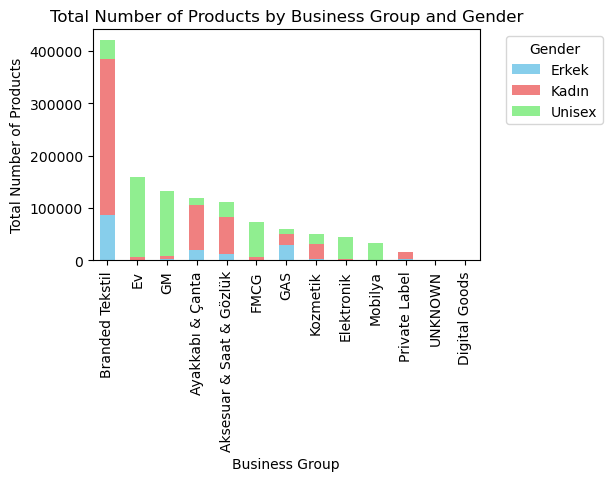

In [6]:
# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_product.groupby(['currentbugroupname', 'gender']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Erkek': 'skyblue', 'Kadın': 'lightcoral', 'Unisex': 'lightgreen'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products by Business Group and Gender')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


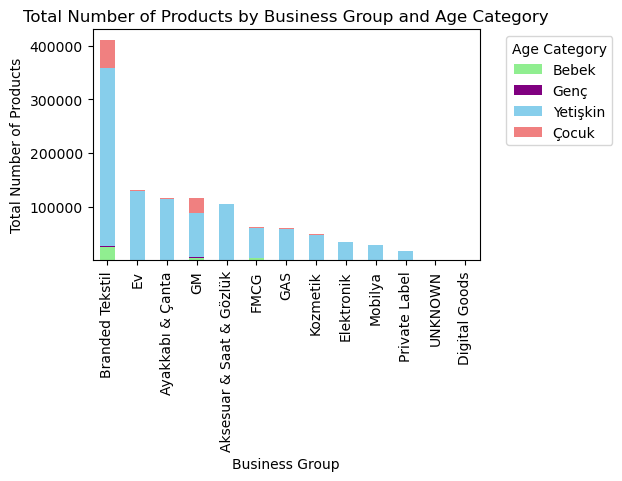

In [7]:

# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_product.groupby(['currentbugroupname', 'age']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Yetişkin': 'skyblue', 'Çocuk': 'lightcoral', 'Bebek': 'lightgreen', 'Genç': 'purple'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products by Business Group and Age Category')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [9]:
v = df_product[df_product['currentbugroupname'] == "GM"]
print("number of business group name: ", v["categoryname"].nunique())
print()
print(v["categoryname"].unique())

number of business group name:  1661

['Deneme - İnceleme' 'Sınav Hazırlık' 'Masa Tenisi Raketi' ...
 'Cam Suyu Bidonu' 'Köpek Eğitim Ürünleri' 'Silindir Kapakları']


In [10]:
df_target_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27086 entries, 0 to 27085
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              27086 non-null  int64 
 1   currentbugroupname  24734 non-null  object
dtypes: int64(1), object(1)
memory usage: 423.3+ KB


In [9]:
print("test: ", len(df_test))
print("sd")
print("train: ", len(df_target_train))

test:  244836
sd
train:  27086


In [10]:
df_target_train["userid"].nunique()

20402

In [11]:
df_test["userid"].nunique()

20403

In [8]:
d = 244836/20403
print(d)

12.0


Shape: (40807, 4)
number of duplicated rows: 0 

     userid gender   age  tenure
0   9798852  Bayan  41.0      89
1  11413556  Bayan  33.0      61
2    818188  Bayan  32.0     125
3  12049002  Bayan  30.0      54
4  10083038  Bayan  39.0      84 

userid    40807
gender        4
age          97
tenure      130
dtype: int64

---- gender ----
gender
Bayan               31202
Bay                  9378
UNKNOWN               218
kvkktalepsilindi        9
Name: count, dtype: int64

*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40807 entries, 0 to 40806
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userid  40807 non-null  int64  
 1   gender  40807 non-null  object 
 2   age     25204 non-null  float64
 3   tenure  40807 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ MB
None

---- MISSING VALUE RATIOS ----
userid    0.000000
gender    0.000000
age       0.382361
tenur

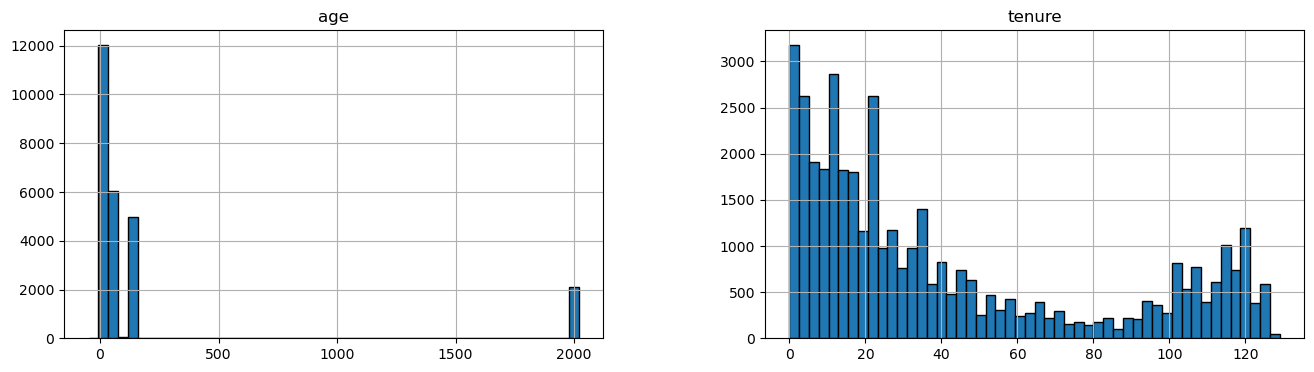

In [12]:
print("Shape:", df_demo.shape)
print("number of duplicated rows:", df_demo[df_demo.duplicated()].shape[0],"\n")
print(df_demo.head(),"\n")
print(df_demo.nunique())
print("\n---- gender ----")
print(df_demo.gender.value_counts(dropna=False))
print("\n*************************\n")
print(df_demo.info())
missing_value_ratios = df_demo.isnull().mean()
print("\n---- MISSING VALUE RATIOS ----")
print(missing_value_ratios)
print("\n*************************\n")
print("Median age:", df_demo["age"].median())
print("Median tenure:", df_demo["tenure"].median(), "\n")
print(df_demo.describe())
print("\n*************************\n")
df_demo[["age", "tenure"]].hist(bins=50,figsize=(16,4),edgecolor = "black")
plt.show()
#df_demo["age"].value_counts()